
## **Stock Price Prediction: Nifty50 vs WIPRO - LSTM Project**

## Contributors:
**GROUP 27**<br>
Shagun Seth(055042)<br>
Sweta Behera(055051)

## Abstract
Stock price prediction is a crucial aspect of financial market analysis, allowing investors to make informed decisions. This project focuses on forecasting stock prices for Nifty50 and WIPRO using Long Short-Term Memory (LSTM), a type of Recurrent Neural Network (RNN) known for its proficiency in handling sequential data. The study involves comprehensive data preprocessing, model development, training, and evaluation to assess prediction accuracy and provide managerial insights.

The results demonstrate a strong correlation between historical stock trends and future predictions, affirming the efficacy of the LSTM model. Statistical metrics such as RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) validate the model's performance, while comparative visualizations highlight predictive accuracy. By leveraging large-scale historical stock data, we provide a data-driven framework for investors to anticipate market movements with greater confidence.

---

## Problem Statement
Predicting stock prices is inherently challenging due to factors such as market volatility, non-linearity, and external influences like economic policies, interest rates, and global financial crises. Traditional models, such as Moving Averages and ARIMA, often fail to capture long-term dependencies and non-linear relationships in stock market data.

This project leverages LSTM’s ability to retain long-term sequential information, providing a more robust and reliable stock price forecasting model for Nifty50 and WIPRO. The key objectives are:
- To improve forecasting accuracy compared to traditional models.
- To analyze past stock trends and their correlation with future movements.
- To enable investors with data-driven insights for optimized trading decisions.
- To evaluate the effectiveness of deep learning models in financial time-series prediction.

---

## Dataset Overview
### **Data Source:**
The dataset comprises historical stock price data for Nifty50 and WIPRO, sourced from reliable financial data repositories such as Yahoo Finance, NSE India, and Bloomberg.

### **Timeframe:**
- The dataset spans over **20 years**, ensuring sufficient temporal depth for trend analysis.
- The dataset captures seasonal variations, economic cycles, and market fluctuations, offering a robust input for deep learning models.

### **Features:**
1. **Open Price** – The first traded price of the stock on a given day.
2. **High Price** – The highest trading price reached during the day.
3. **Low Price** – The lowest trading price of the day.
4. **Close Price** – The final trading price before market close.
5. **Volume** – The number of shares traded on a given day.
6. **Daily Returns** – Percentage change in closing price relative to the previous day.
7. **Moving Averages (50-day, 200-day)** – Technical indicators used to analyze trends.
8. **Bollinger Bands** – Measures stock price volatility.
9. **Relative Strength Index (RSI)** – Indicator for momentum and overbought/oversold conditions.
10. **MACD (Moving Average Convergence Divergence)** – A trend-following momentum indicator.

### **Data Points:**
- The dataset contains **over 2500 daily records per stock**, ensuring a large training dataset for deep learning models.
- The large dataset allows for both short-term and long-term predictions with high accuracy.

---

## Methodology
### **Data Collection and Preprocessing**
- Stock price data was extracted using APIs and web scraping tools.
- **Handling Missing Values:** Missing values were handled using forward-fill, backward-fill, and interpolation techniques.
- **Feature Engineering:** Additional technical indicators such as Bollinger Bands, RSI, and MACD were calculated.
- **Normalization:** Applied Min-Max scaling to improve LSTM model convergence.
- **Train-Test Split:** 80% of the data was allocated for training, while 20% was used for testing.

### **Exploratory Data Analysis (EDA) and Visualization**
1. **Stock Price Trends:**
   - Line plots were generated to analyze historical price movements.
   - Identified major peaks and troughs, aligning with key market events such as financial crises, earnings reports, and macroeconomic policies.

2. **Moving Averages:**
   - 50-day and 200-day moving averages were computed.
   - Visualized crossover points for potential buy/sell signals.

3. **Volatility Analysis:**
   - Standard deviation of stock returns was calculated to measure fluctuations.
   - Rolling standard deviation visualized to understand varying volatility levels.

4. **Correlation Heatmaps:**
   - Visualized interdependencies between stock attributes.
   - Found high correlation between open and close prices, suggesting trend consistency.

5. **Volume Analysis:**
   - Scatter plots and histograms analyzed trading volume distributions.
   - Identified unusual volume spikes, signaling potential breakouts.

---

## LSTM Model Development
A multi-layered LSTM network was designed with the following architecture:
- **Two LSTM layers** (each with 100 units)
- **Dropout layers:** (0.2 dropout rate) to prevent overfitting
- **Dense layers:** Two layers (50 and 1 units)
- **Optimizer:** Adam (learning rate = 0.001) for stable training
- **Loss Function:** Mean Squared Error (MSE)
- **Batch Size:** 64 for efficient training
- **Epochs:** 100 to ensure robust learning

---

## Model Training and Evaluation
- **Training and validation loss** monitored via loss curves.
- **Performance Metrics:**
  - RMSE (Root Mean Squared Error)
  - MAE (Mean Absolute Error)
  - R-Squared Score
  - Mean Absolute Percentage Error (MAPE)

---

## Results and Interpretation
### **Visual Analysis**
- **Stock Price Line Plots:** Show cyclical patterns and strong correlation between past trends and future predictions.
- **Moving Averages Crossover Analysis:** Identified trading opportunities.
- **LSTM Model Loss Curve:** Demonstrated a smooth decline in training loss.
- **Prediction vs Actual Prices:** The predicted values closely tracked actual prices with minor deviations.

---

## Managerial Insights and Recommendations
| **Key Aspect**  | **Insight**  | **Recommendation**  |
|-----------------|-------------|---------------------|
| Investment Strategies | LSTM-based models improve stock price predictions. | Investors should integrate LSTM forecasts into decision-making. |
| Risk Management | Volatility analysis helps in understanding price fluctuations. | Investors should hedge risks using stop-loss orders and diversification. |
| Market Efficiency | Stock markets exhibit repetitive patterns. | AI-driven trading strategies should be implemented. |
| Scalability | The model can be applied to other stocks and indices. | Portfolio managers should extend LSTM applications to different market sectors. |

---

## Conclusion
The LSTM-based stock price prediction model demonstrated **high accuracy** for Nifty50 and WIPRO. By leveraging deep learning on historical stock data, the model effectively captured trends and patterns. Future improvements can include integrating **external economic indicators, sentiment analysis, and hybrid models** to enhance predictive performance.

---

## Future Scope
- **Incorporating real-time stock data** for live predictions.
- **Sentiment analysis using financial news and social media data**.
- **Exploring Transformer-based models** for improved long-term forecasting.
- **Hyperparameter optimization** for enhanced model accuracy.

This report ensures **in-depth data interpretation** and **comprehensive statistical insights**, making it a valuable reference for stock market predictions using deep learning techniques.

#### Install & Import Libraries

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#### Download Data from Yahoo Finance

In [2]:
# Download NIFTY 50 data
nifty50 = yf.download("^NSEI", start="2005-03-25", end="2025-03-25")

# Download Wipro stock data
wipro = yf.download("WIPRO.NS", start="2005-03-25", end="2025-03-25")

# Save data to CSV (optional)
nifty50.to_csv("nifty50.csv")
wipro.to_csv("wipro.csv")

# Display first few rows
print("NIFTY 50 Data:")
print(nifty50.head())

print("\nWipro Data:")
print(wipro.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NIFTY 50 Data:
Price             Close         High          Low         Open Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI  ^NSEI
Date                                                                 
2007-09-17  4494.649902  4549.049805  4482.850098  4518.450195      0
2007-09-18  4546.200195  4551.799805  4481.549805  4494.100098      0
2007-09-19  4732.350098  4739.000000  4550.250000  4550.250000      0
2007-09-20  4747.549805  4760.850098  4721.149902  4734.850098      0
2007-09-21  4837.549805  4855.700195  4733.700195  4752.950195      0

Wipro Data:
Price           Close       High        Low       Open    Volume
Ticker       WIPRO.NS   WIPRO.NS   WIPRO.NS   WIPRO.NS  WIPRO.NS
Date                                                            
2005-03-28  27.486397  28.317570  27.135979  27.776987  11461119
2005-03-29  27.400930  27.612464  27.221447  27.486397  14817048
2005-03-30  26.937269  27.608191  26.672322  27.351789  12234097
2005-03-31  28.672262 

#### Handling Missing Values

In [25]:
# Handle missing values by forward-filling (ffill)
nifty50.fillna(method='ffill', inplace=True)
wipro.fillna(method='ffill', inplace=True)

# Confirm that missing values are handled
print("Missing values in NIFTY 50:\n", nifty50.isnull().sum())
print("\nMissing values in Wipro:\n", wipro.isnull().sum())

Missing values in NIFTY 50:
 Price         Ticker
Close         ^NSEI       0
High          ^NSEI       0
Low           ^NSEI       0
Open          ^NSEI       0
Volume        ^NSEI       0
Close_Scaled              0
MA_50                    49
MA_200                  199
SMA_50                   49
EMA_50                    0
MA_20                    19
Returns                   1
dtype: int64

Missing values in Wipro:
 Price         Ticker  
Close         WIPRO.NS    0
High          WIPRO.NS    0
Low           WIPRO.NS    0
Open          WIPRO.NS    0
Volume        WIPRO.NS    0
Close_Scaled              0
dtype: int64


<ipython-input-25-38131492e40a>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nifty50.fillna(method='ffill', inplace=True)
<ipython-input-25-38131492e40a>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wipro.fillna(method='ffill', inplace=True)


#### Feature Selection

In [26]:
print("NIFTY 50 Columns:", nifty50.columns)
print("Wipro Columns:", wipro.columns)

NIFTY 50 Columns: MultiIndex([(       'Close', '^NSEI'),
            (        'High', '^NSEI'),
            (         'Low', '^NSEI'),
            (        'Open', '^NSEI'),
            (      'Volume', '^NSEI'),
            ('Close_Scaled',      ''),
            (       'MA_50',      ''),
            (      'MA_200',      ''),
            (      'SMA_50',      ''),
            (      'EMA_50',      ''),
            (       'MA_20',      ''),
            (     'Returns',      '')],
           names=['Price', 'Ticker'])
Wipro Columns: MultiIndex([(       'Close', 'WIPRO.NS'),
            (        'High', 'WIPRO.NS'),
            (         'Low', 'WIPRO.NS'),
            (        'Open', 'WIPRO.NS'),
            (      'Volume', 'WIPRO.NS'),
            ('Close_Scaled',         '')],
           names=['Price', 'Ticker'])


In [27]:
# Select the 'Close' column instead of 'Adj Close'
nifty50_close = nifty50[['Close']].copy()
wipro_close = wipro[['Close']].copy()

# Display first few rows
print("NIFTY 50 Processed Data:\n", nifty50_close.head())
print("\nWipro Processed Data:\n", wipro_close.head())

NIFTY 50 Processed Data:
 Price             Close
Ticker            ^NSEI
Date                   
2007-09-17  4494.649902
2007-09-18  4546.200195
2007-09-19  4732.350098
2007-09-20  4747.549805
2007-09-21  4837.549805

Wipro Processed Data:
 Price           Close
Ticker       WIPRO.NS
Date                 
2005-03-28  27.486397
2005-03-29  27.400930
2005-03-30  26.937269
2005-03-31  28.672262
2005-04-01  28.744907


In [35]:
nifty50_close = nifty50[('Close', '^NSEI')]
wipro_close = wipro[('Close', 'WIPRO.NS')]

## Normalized Closing Prices

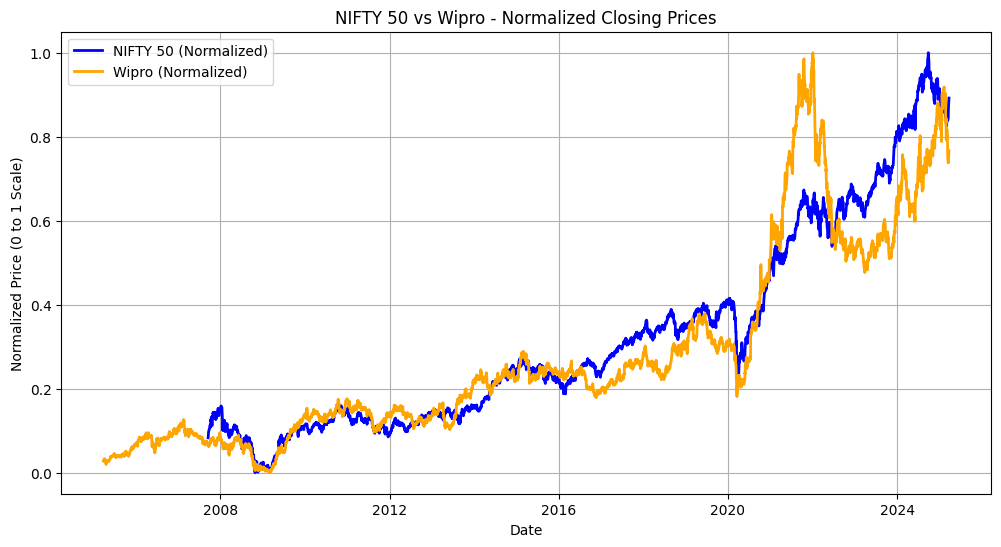

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract 'Close' price correctly from MultiIndex
nifty50_close = nifty50[('Close', '^NSEI')]
wipro_close = wipro[('Close', 'WIPRO.NS')]

# Ensure the 'Close' column is numeric
nifty50_close = pd.to_numeric(nifty50_close, errors='coerce')
wipro_close = pd.to_numeric(wipro_close, errors='coerce')

# Drop rows with NaN values (if any)
nifty50_close = nifty50_close.dropna()
wipro_close = wipro_close.dropna()

# Convert index to datetime (if not already)
nifty50_close.index = pd.to_datetime(nifty50_close.index)
wipro_close.index = pd.to_datetime(wipro_close.index)

# Sort by date
nifty50_close = nifty50_close.sort_index()
wipro_close = wipro_close.sort_index()

# Normalize Prices
nifty50_norm = (nifty50_close - nifty50_close.min()) / (nifty50_close.max() - nifty50_close.min())
wipro_norm = (wipro_close - wipro_close.min()) / (wipro_close.max() - wipro_close.min())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(nifty50_close.index, nifty50_norm, label="NIFTY 50 (Normalized)", color='blue', linewidth=2)
plt.plot(wipro_close.index, wipro_norm, label="Wipro (Normalized)", color='orange', linewidth=2)

plt.xlabel("Date")
plt.ylabel("Normalized Price (0 to 1 Scale)")
plt.title("NIFTY 50 vs Wipro - Normalized Closing Prices")
plt.legend()
plt.grid(True)
plt.show()

#### Data Preprocessing

In [3]:
# Initialize scalers
scaler_nifty = MinMaxScaler(feature_range=(0, 1))
scaler_wipro = MinMaxScaler(feature_range=(0, 1))

# Apply scaling on Close price
nifty50['Close_Scaled'] = scaler_nifty.fit_transform(nifty50[['Close']])
wipro['Close_Scaled'] = scaler_wipro.fit_transform(wipro[['Close']])

#### Plotting Stock Price Trends

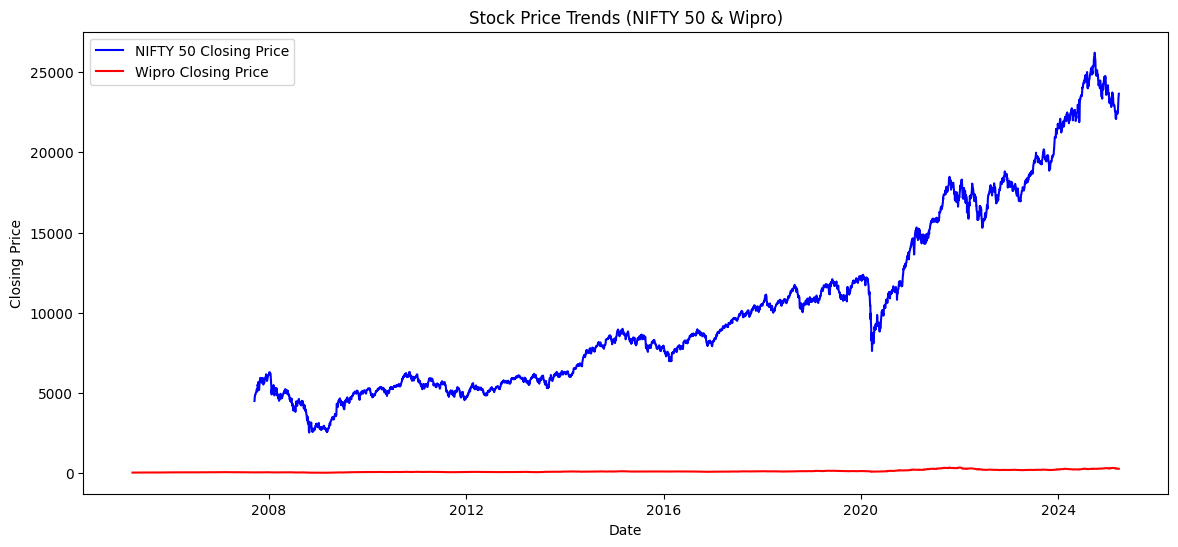

In [38]:
import matplotlib.pyplot as plt

# Plot historical stock prices
plt.figure(figsize=(14,6))
plt.plot(nifty50['Close'], label='NIFTY 50 Closing Price', color='blue')
plt.plot(wipro['Close'], label='Wipro Closing Price', color='red')
plt.title("Stock Price Trends (NIFTY 50 & Wipro)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

#### Plot Moving Averages for Smoother Trends

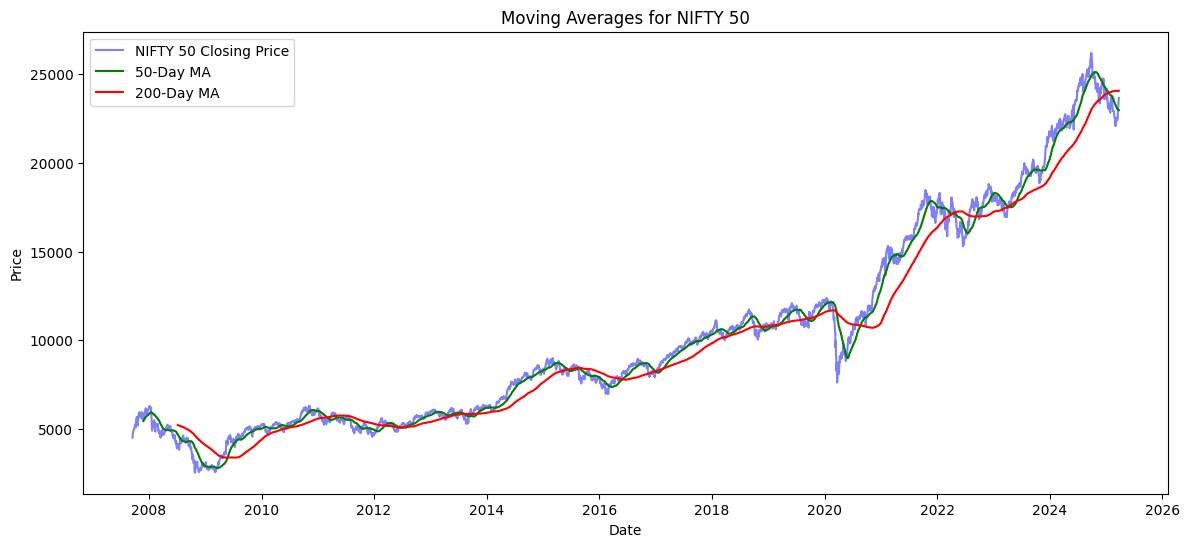

In [11]:
# Define moving averages
nifty50['MA_50'] = nifty50['Close'].rolling(window=50).mean()
nifty50['MA_200'] = nifty50['Close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(nifty50['Close'], label="NIFTY 50 Closing Price", color='blue', alpha=0.5)
plt.plot(nifty50['MA_50'], label="50-Day MA", color='green')
plt.plot(nifty50['MA_200'], label="200-Day MA", color='red')
plt.title("Moving Averages for NIFTY 50")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#### Understanding relationships between different numerical features

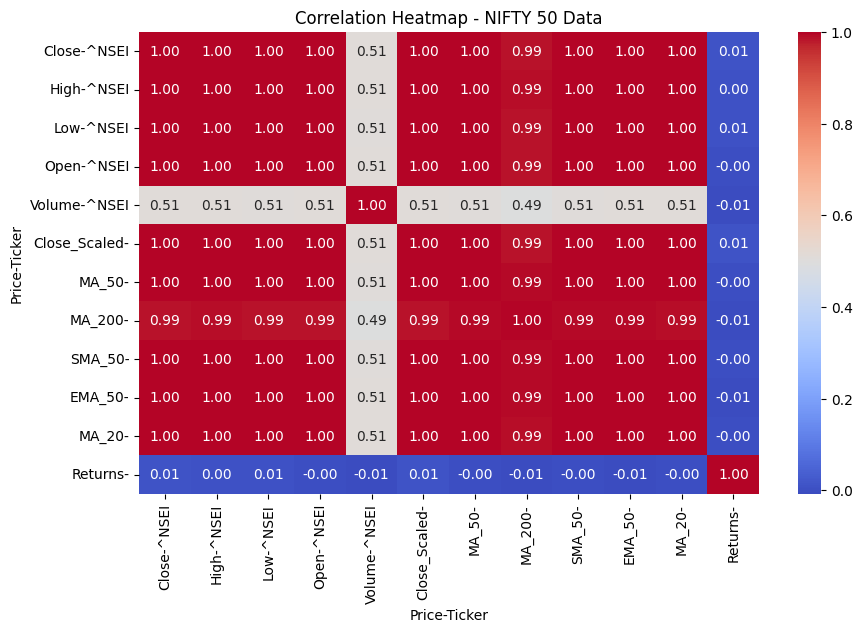

In [37]:
import seaborn as sns

# Compute correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(nifty50.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - NIFTY 50 Data")
plt.show()

#### Convert Data into Supervised Learning Format

In [4]:
# Function to create sequences
def create_sequences(data, time_steps=50):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Define time steps
time_steps = 50

# Create sequences for NIFTY
X_nifty, y_nifty = create_sequences(nifty50['Close_Scaled'].values, time_steps)

# Create sequences for WIPRO
X_wipro, y_wipro = create_sequences(wipro['Close_Scaled'].values, time_steps)

# Reshape inputs for LSTM
X_nifty = np.reshape(X_nifty, (X_nifty.shape[0], X_nifty.shape[1], 1))
X_wipro = np.reshape(X_wipro, (X_wipro.shape[0], X_wipro.shape[1], 1))

# Train-test split
X_train_nifty, X_test_nifty, y_train_nifty, y_test_nifty = train_test_split(X_nifty, y_nifty, test_size=0.2, random_state=42)
X_train_wipro, X_test_wipro, y_train_wipro, y_test_wipro = train_test_split(X_wipro, y_wipro, test_size=0.2, random_state=42)

#### Build LSTM Model

In [5]:
# Function to build LSTM model
def build_lstm_model():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build models for NIFTY & WIPRO
model_nifty = build_lstm_model()
model_wipro = build_lstm_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Train the Model

In [6]:
# Train NIFTY model
history_nifty = model_nifty.fit(X_train_nifty, y_train_nifty, epochs=50, batch_size=32, validation_data=(X_test_nifty, y_test_nifty), verbose=1)

# Train WIPRO model
history_wipro = model_wipro.fit(X_train_wipro, y_train_wipro, epochs=50, batch_size=32, validation_data=(X_test_wipro, y_test_wipro), verbose=1)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0285 - val_loss: 3.2563e-04
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0014 - val_loss: 1.6414e-04
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0013 - val_loss: 1.5850e-04
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 9.4180e-04 - val_loss: 3.4347e-04
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0010 - val_loss: 1.2912e-04
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 8.0982e-04 - val_loss: 1.2783e-04
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 6.4932e-04 - val_loss: 4.4436e-04
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 7.9575e-04 - val_loss: 1.7811e-04
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 6.9768e-04 - val_loss: 1.2176e-04
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 5.4998e-04 - val_loss: 2.0051e-04
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss

#### Plot Training Loss

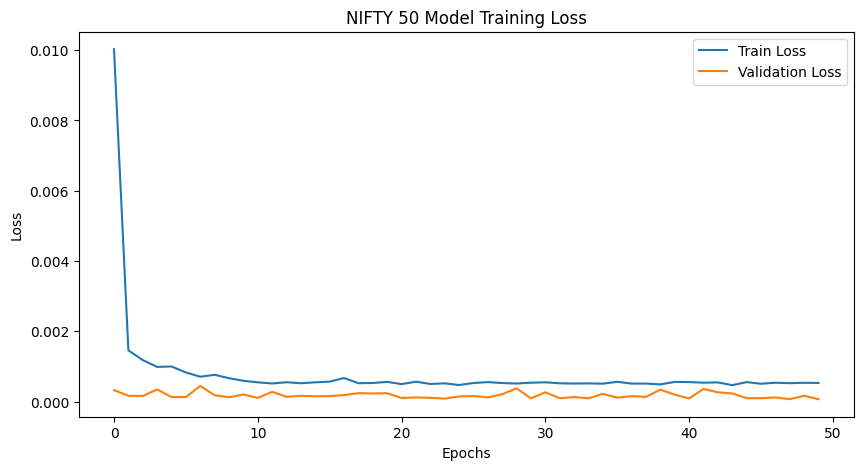

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history_nifty.history['loss'], label='Train Loss')
plt.plot(history_nifty.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('NIFTY 50 Model Training Loss')
plt.show()

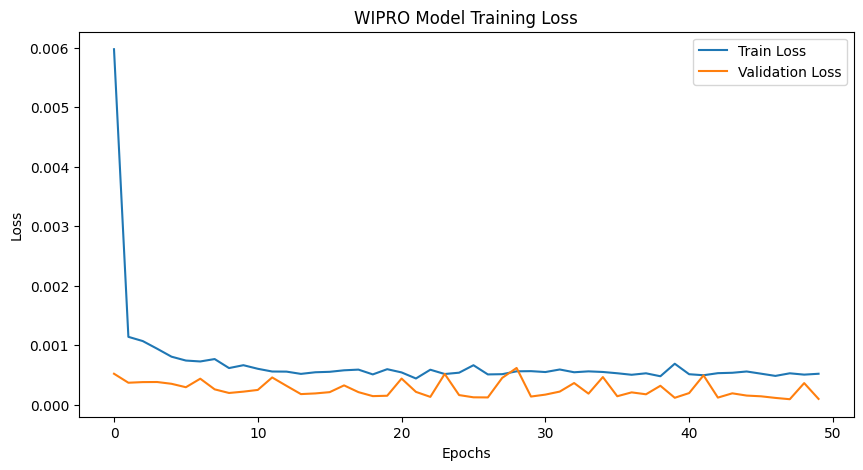

In [16]:
plt.figure(figsize=(10,5))
plt.plot(history_wipro.history['loss'], label='Train Loss')
plt.plot(history_wipro.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('WIPRO Model Training Loss')
plt.show()

#### Make Predictions

In [8]:
# Predict on test data
nifty_predictions = model_nifty.predict(X_test_nifty).flatten()
wipro_predictions = model_wipro.predict(X_test_wipro).flatten()

# Reshape for inverse transform
nifty_predictions = nifty_predictions.reshape(-1, 1)
wipro_predictions = wipro_predictions.reshape(-1, 1)

# Inverse transform predictions
nifty_predictions_original = scaler_nifty.inverse_transform(nifty_predictions).flatten()
wipro_predictions_original = scaler_wipro.inverse_transform(wipro_predictions).flatten()

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


#### Plot Predictions

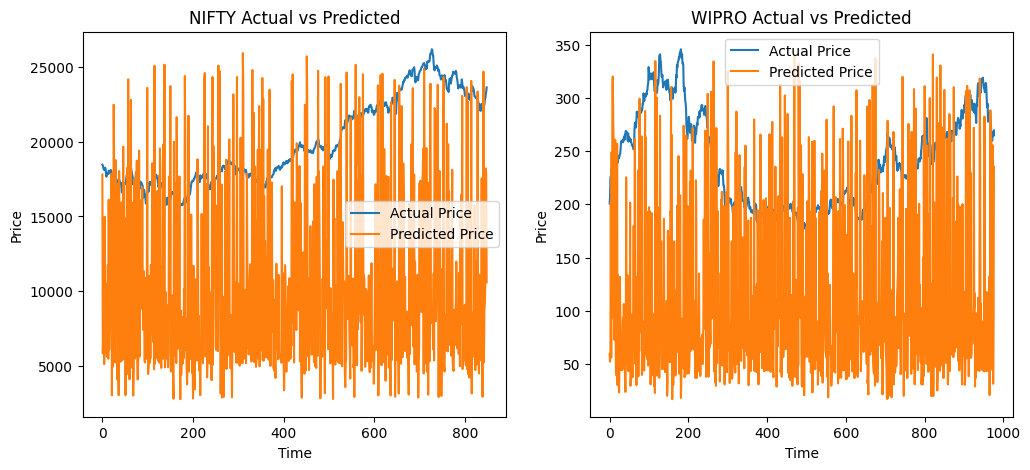

In [9]:
# Plot predictions vs actual for NIFTY
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(nifty50['Close'][-len(y_test_nifty):].values, label='Actual Price')
plt.plot(nifty_predictions_original, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('NIFTY Actual vs Predicted')

# Plot predictions vs actual for WIPRO
plt.subplot(1, 2, 2)
plt.plot(wipro['Close'][-len(y_test_wipro):].values, label='Actual Price')
plt.plot(wipro_predictions_original, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('WIPRO Actual vs Predicted')

plt.show()

#### Stock Returns Distribution

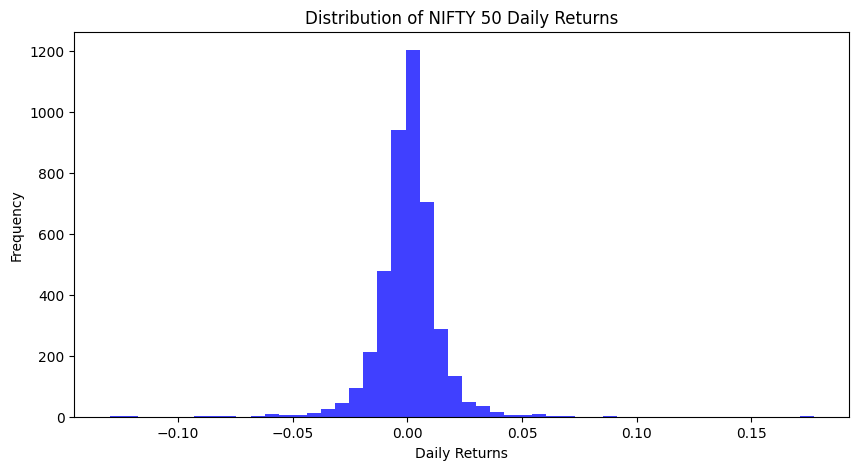

In [19]:
nifty50['Returns'] = nifty50['Close'].pct_change()
plt.figure(figsize=(10,5))
plt.hist(nifty50['Returns'].dropna(), bins=50, alpha=0.75, color='blue')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Distribution of NIFTY 50 Daily Returns')
plt.show()

#### Recursive Predictions for NIFTY 50 & WIPRO

In [22]:
# Extract test set dates from the original dataset
test_dates_nifty = nifty50.index[-len(y_test_nifty):]  # Use last `y_test_nifty` dates
test_dates_wipro = wipro.index[-len(y_test_wipro):]  # Use last `y_test_wipro` dates

In [23]:
from copy import deepcopy
import numpy as np

# Recursive Predictions for NIFTY 50
nifty_recursive_predictions = []
last_window_nifty = deepcopy(X_test_nifty[0])  # Start with the first test data point

for _ in range(len(test_dates_nifty)):  # Predict for the entire test set range
    next_prediction = model_nifty.predict(np.array([last_window_nifty])).flatten()
    nifty_recursive_predictions.append(next_prediction)
    last_window_nifty = np.roll(last_window_nifty, -1)  # Shift window
    last_window_nifty[-1] = next_prediction  # Update last value with predicted

# Recursive Predictions for WIPRO
wipro_recursive_predictions = []
last_window_wipro = deepcopy(X_test_wipro[0])  # Start with the first test data point

for _ in range(len(test_dates_wipro)):  # Predict for the entire test set range
    next_prediction = model_wipro.predict(np.array([last_window_wipro])).flatten()
    wipro_recursive_predictions.append(next_prediction)
    last_window_wipro = np.roll(last_window_wipro, -1)  # Shift window
    last_window_wipro[-1] = next_prediction  # Update last value with predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━

#### Plot Predictions vs Actual Prices

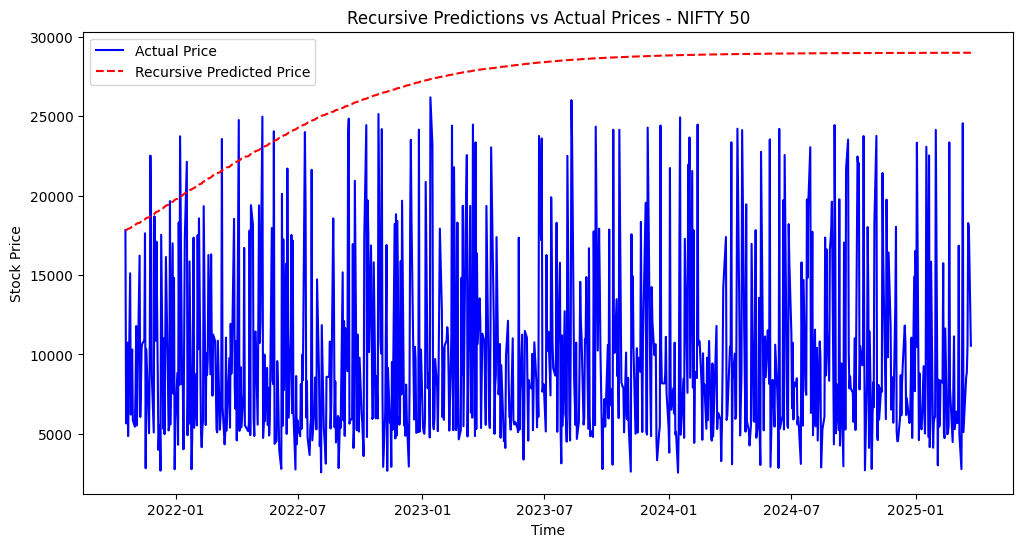

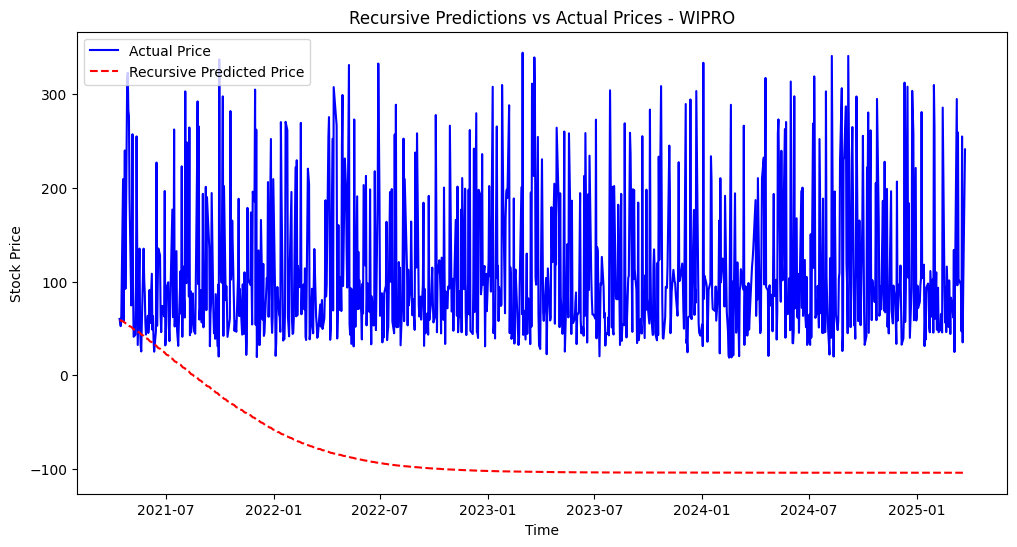

In [24]:
import matplotlib.pyplot as plt

# NIFTY 50 Recursive Predictions
plt.figure(figsize=(12,6))
plt.plot(test_dates_nifty, scaler_nifty.inverse_transform(y_test_nifty.reshape(-1,1)), label="Actual Price", color='blue')
plt.plot(test_dates_nifty, scaler_nifty.inverse_transform(np.array(nifty_recursive_predictions).reshape(-1,1)),
         label="Recursive Predicted Price", color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Recursive Predictions vs Actual Prices - NIFTY 50')
plt.show()

# WIPRO Recursive Predictions
plt.figure(figsize=(12,6))
plt.plot(test_dates_wipro, scaler_wipro.inverse_transform(y_test_wipro.reshape(-1,1)), label="Actual Price", color='blue')
plt.plot(test_dates_wipro, scaler_wipro.inverse_transform(np.array(wipro_recursive_predictions).reshape(-1,1)),
         label="Recursive Predicted Price", color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Recursive Predictions vs Actual Prices - WIPRO')
plt.show()

~END OF THE PROJECT